In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem

In [2]:
def data(x):
    noise = []
    for i in x:
        noise.append(i + 2*np.random.normal())
    return noise

def f(x,m,b):
    return m*x + b
    
def MSE(y, ypred):
    error = (1/len(y)) * np.sum((np.array(y)-np.array(ypred))**2)
    return error

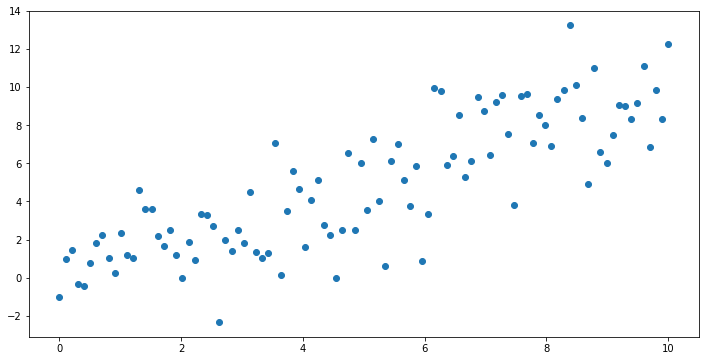

In [3]:
plt.figure(figsize=(12,6))
x = np.linspace(0,10,100)

plt.scatter(x,data(x));

Mean Squared Error: 12.696595960094653


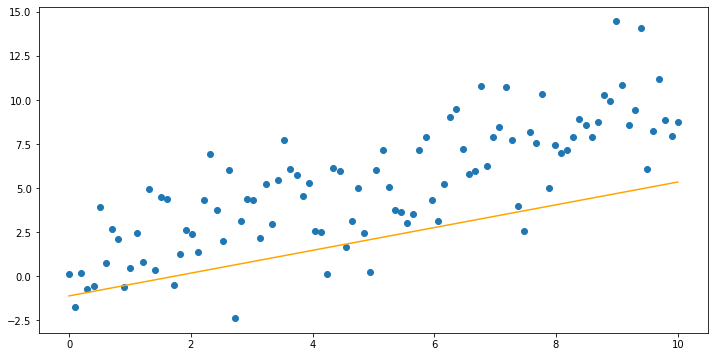

In [4]:
plt.figure(figsize=(12,6))
plt.scatter(x,data(x))
m = np.random.normal()
b = np.random.normal()
plt.plot(x,f(x,m,b), color = "orange")
y = data(x)
ypred = f(x,m,b)
print("Mean Squared Error: " + str(MSE(y,ypred)));

In [5]:
m = np.arange(-10,11,1)
b = 0 
y = data(x)

error = []
for i in range(0,len(m)):
    ypred = f(x,m[i],b)
    error.append(MSE(y,ypred))
    

Text(0, 0.5, 'Error')

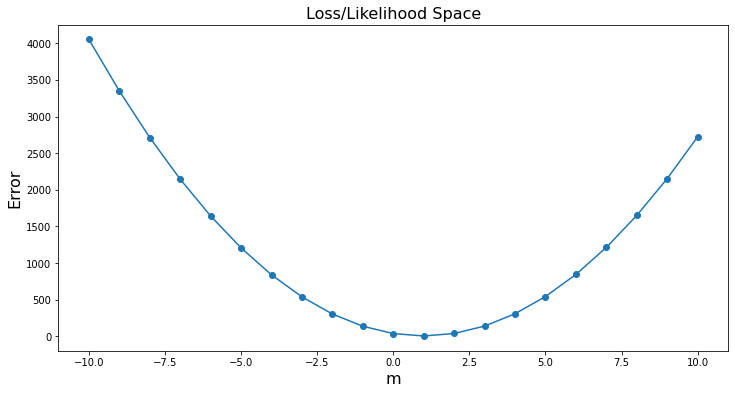

In [6]:
plt.figure(figsize=(12,6))
plt.plot(m,error,"-o")
plt.title("Loss/Likelihood Space", fontsize = 16)
plt.xlabel("m", fontsize = 16)
plt.ylabel("Error", fontsize = 16)

# Gradient Decent 

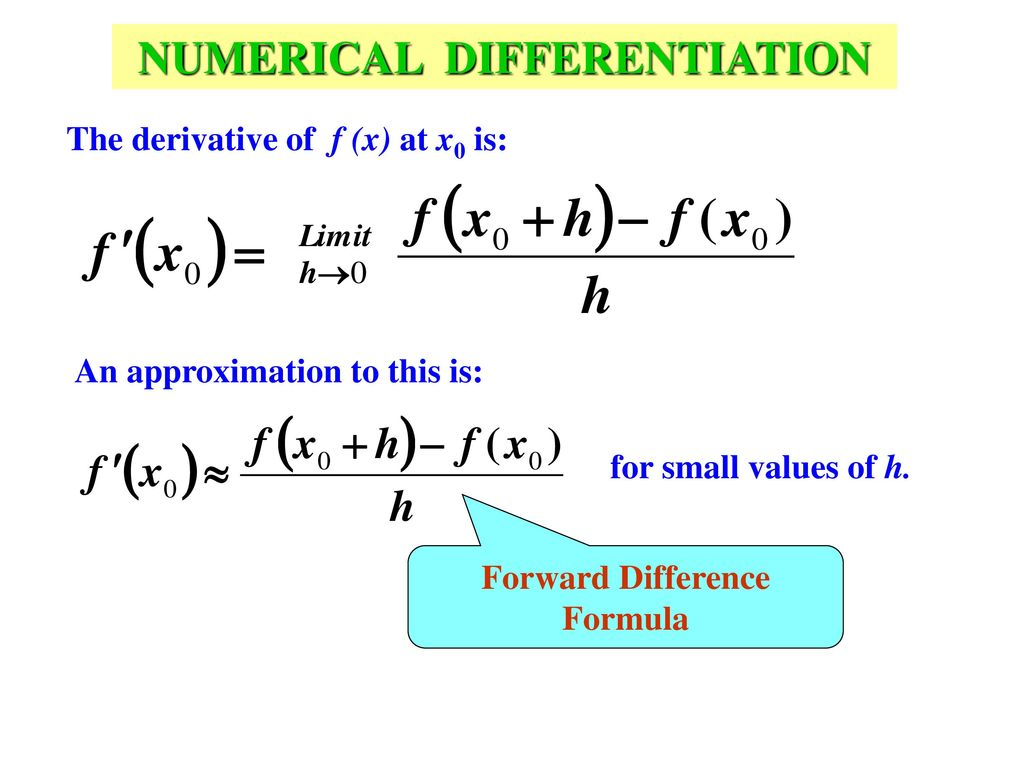

In [7]:
def numericGradient(x1,x2,h):
    gradient = (likelihood(x2) - likelihood(x1))/h
    return gradient

def likelihood(x):
    return x**2

In [8]:
h = .1
x1 = np.random.randint(-10,10)
x2 = x1 + h

steps = [x1]
stepsize = .5
for i in range(0,15):
    dx = numericGradient(x1,x2,h)
    step = -(dx/abs(dx)) * stepsize
    
    x1 += step
    x2 = x1 + h
    steps.append(x1)

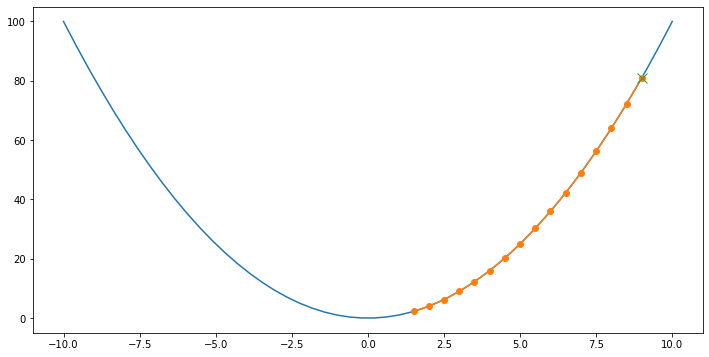

In [9]:
x = np.linspace(-10,10)
y = likelihood(x)

plt.figure(figsize=(12,6))
plt.plot(x,y)
plt.plot(steps,likelihood(np.array(steps)),"-o")
plt.plot(steps[0],likelihood(np.array(steps[0])),"x", markersize = 10)

In [10]:
def regressionLikelihood(x,y,m,b):
    ypred = f(x,m,b)
    return MSE(y,ypred)

def regressionGradient(x,y,m1,m2,b1,b2,h):
    mgradient = (regressionLikelihood(x,y,m2,b1) - regressionLikelihood(x,y,m1,b1))/h
    bgradient = (regressionLikelihood(x,y,m1,b2) - regressionLikelihood(x,y,m1,b1))/h
    return mgradient, bgradient

In [11]:
x = np.linspace(0,10,100)
y = data(x)

h = .1
m1 = np.random.randint(-10,10)
m2 = m1 + h

b1 = np.random.randint(-10,10)
b2 = b1 + h

ms = [m1]
bs = [b1]

stepsize = .1
for i in range(0,250):
    mx, bx = regressionGradient(x,y,m1,m2,b1,b2,h)
    mstep = -(mx/abs(mx)) * stepsize
    bstep = -(bx/abs(bx)) * stepsize
    
    m1 += mstep
    m2 = m1 + h
    
    b1 += bstep
    b2 = b1 + h
    
    ms.append(m1)
    bs.append(b1)

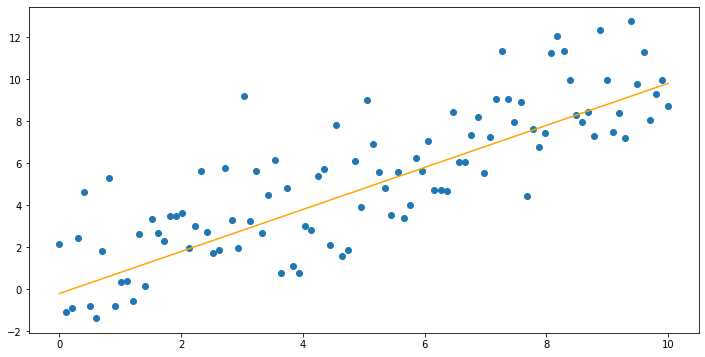

In [12]:
plt.figure(figsize=(12,6))
plt.scatter(x,y)
plt.plot(x,m1*x+b1, c = "orange");

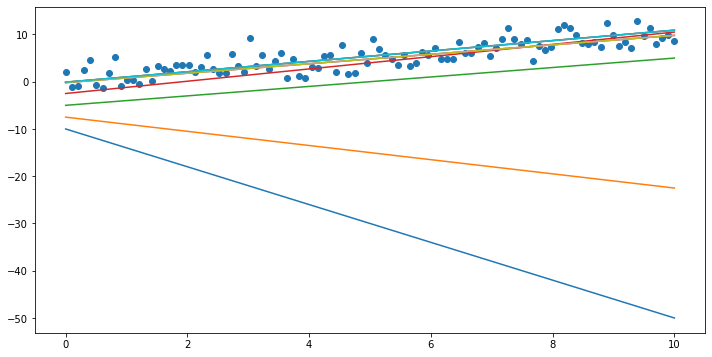

In [13]:
plt.figure(figsize=(12,6))
plt.scatter(x,y)
for i in range(0,250,25):
    plt.plot(x,ms[i]*x+bs[i]);

# Genetic Algorithm

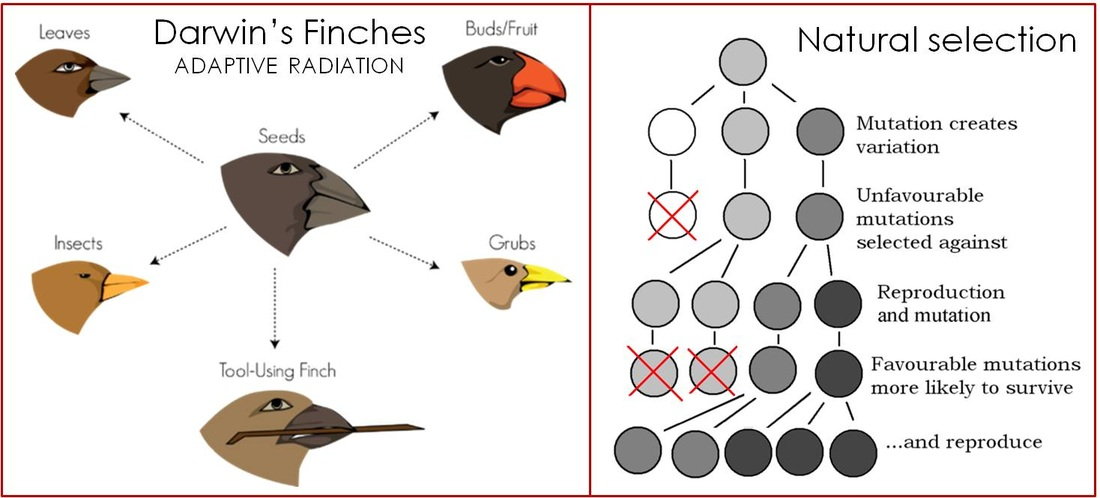

In [14]:
x = np.linspace(0,10,100)
y = data(x)

m = np.random.normal(size = 10)
b = np.random.normal(size = 10)

errors = []
for i in range(0,len(m)):
    ypred = f(x,m[i],b[i])
    errors.append(MSE(y,ypred))

In [15]:
print("M : " + str(m[0:5]))
print("B : " + str(b[0:5]))
print("MSE : " + str(errors[0:5]))

M : [ 0.46020475  0.23921614 -0.26325456  0.10108071 -1.20714204]
B : [-0.38619587 -0.44395548 -0.01017851  1.18377411 -1.01593097]
MSE : [14.177554437690317, 24.6838823107143, 54.43585725348829, 19.789054297495777, 185.28251796837102]


In [16]:
bestLine = errors.index(min(errors))

m = m[bestLine]
b = b[bestLine]


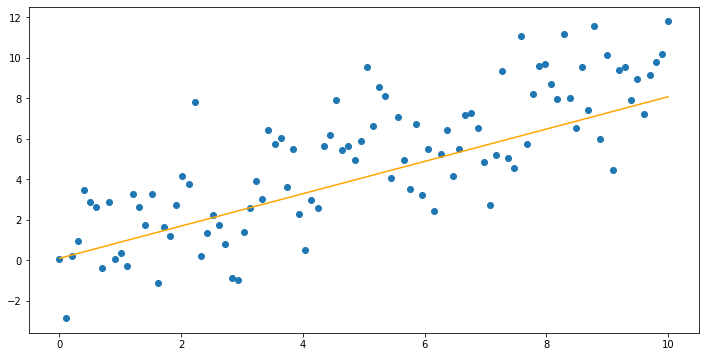

In [17]:
plt.figure(figsize=(12,6))
plt.scatter(x,data(x))
plt.plot(x,f(x,m,b), color = "orange");

In [18]:
m = .1*np.random.normal(size = 10) + m
b = .1*np.random.normal(size = 10) + b

errors = []
for i in range(0,len(m)):
    ypred = f(x,m[i],b[i])
    errors.append(MSE(y,ypred))

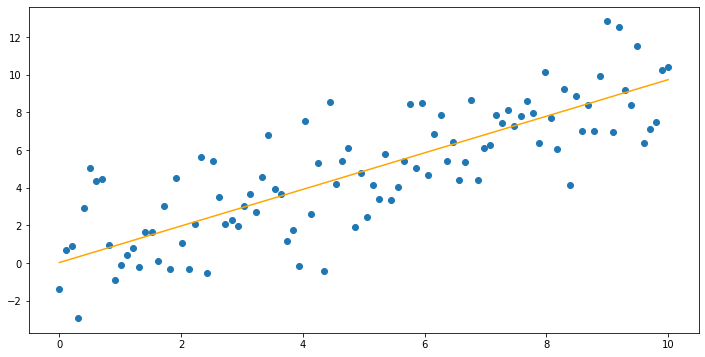

In [19]:
bestLine = errors.index(min(errors))
m = m[bestLine]
b = b[bestLine]

plt.figure(figsize=(12,6))
plt.scatter(x,data(x))
plt.plot(x,f(x,m,b), color = "orange");

In [20]:
m = np.random.normal()
b = np.random.normal()

lines = []

for i in range(0,25):
    m = .1*np.random.normal(size = 10) + m
    b = .1*np.random.normal(size = 10) + b

    errors = []
    for j in range(0,len(m)):
        ypred = f(x,m[j],b[j])
        
        errors.append(MSE(y,ypred))

    bestLine = errors.index(min(errors))
    m = m[bestLine]
    b = b[bestLine]
    lines.append(f(x,m,b))
    print("Generation " + str(i) +" error = " +str(min(errors)))

Generation 0 error = 10.716401262051097
Generation 1 error = 6.22987669359769
Generation 2 error = 4.580432592939718
Generation 3 error = 4.377133815689446
Generation 4 error = 4.307169820418533
Generation 5 error = 3.9993715498990388
Generation 6 error = 3.8879369644842394
Generation 7 error = 3.849841249668752
Generation 8 error = 3.7499771672211217
Generation 9 error = 3.7446955054881945
Generation 10 error = 3.6944667704159615
Generation 11 error = 3.7392238998810026
Generation 12 error = 3.746021167562523
Generation 13 error = 3.766127442058261
Generation 14 error = 3.6035078996743097
Generation 15 error = 3.616572973333634
Generation 16 error = 3.5228411659058487
Generation 17 error = 3.554702511271394
Generation 18 error = 3.522178979436832
Generation 19 error = 3.4831423382799067
Generation 20 error = 3.4762113880111594
Generation 21 error = 3.482326011276399
Generation 22 error = 3.4383389017893227
Generation 23 error = 3.4096998252289676
Generation 24 error = 3.41366483302621

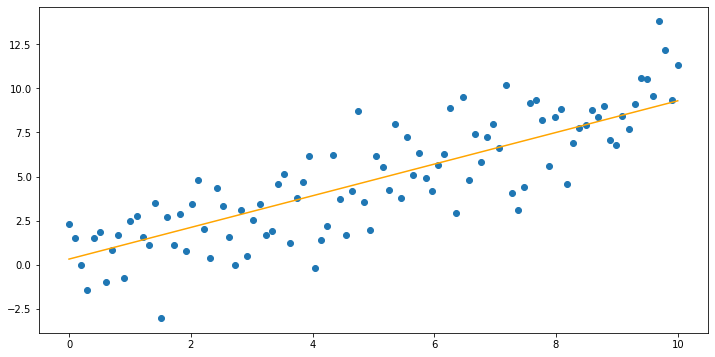

In [21]:
plt.figure(figsize=(12,6))
plt.scatter(x,y)
plt.plot(x,lines[-1], color = "orange")

# Simulated Annealing

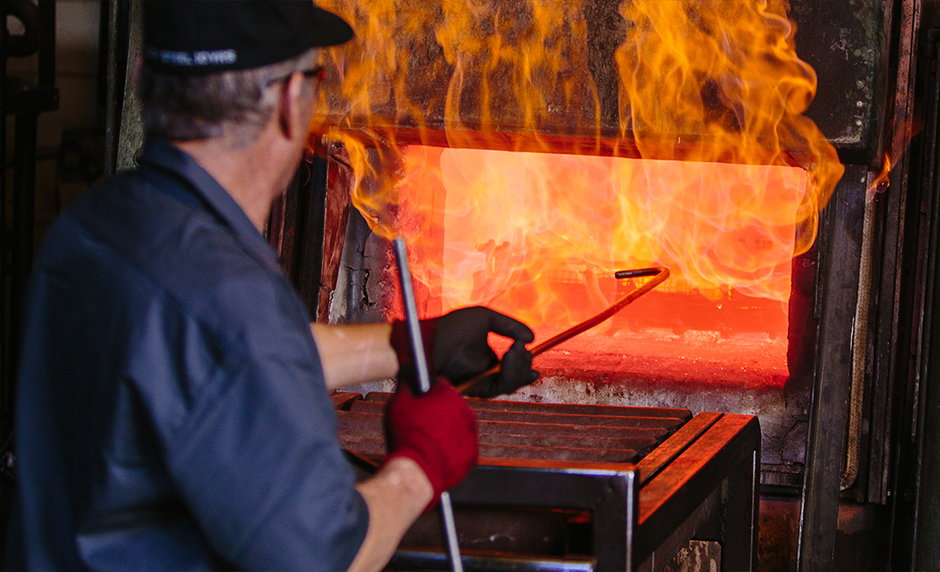

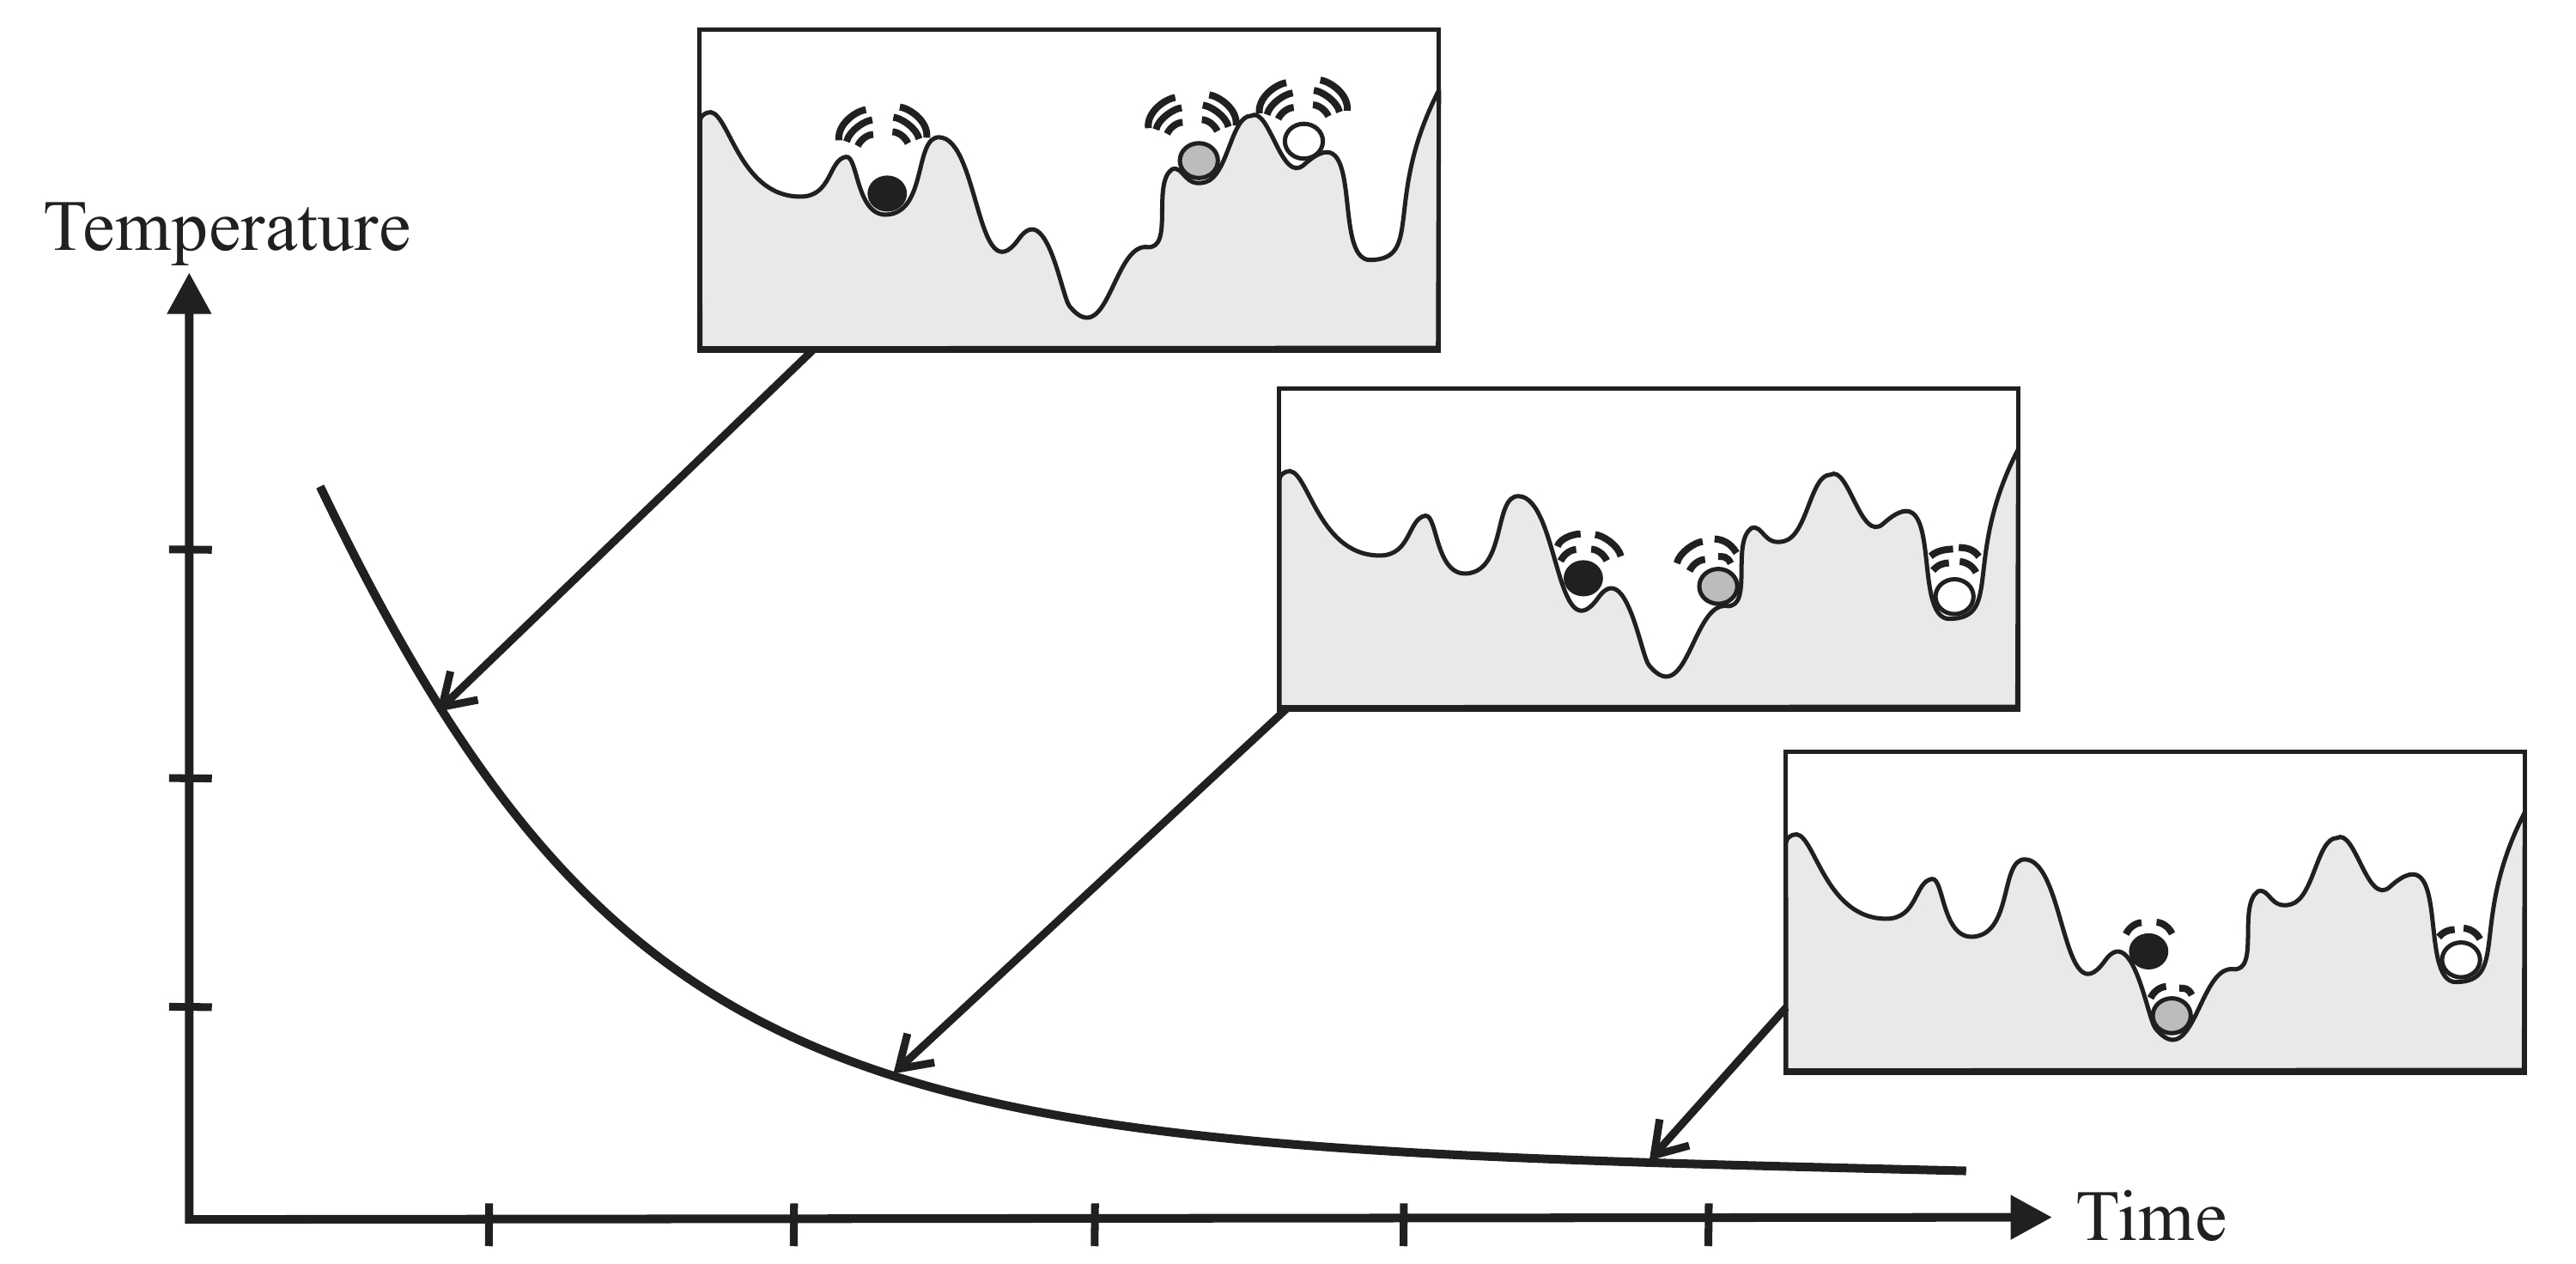

In [22]:
def annealingData(x):
    y = abs(.5*x) + np.sin(x)
    return y

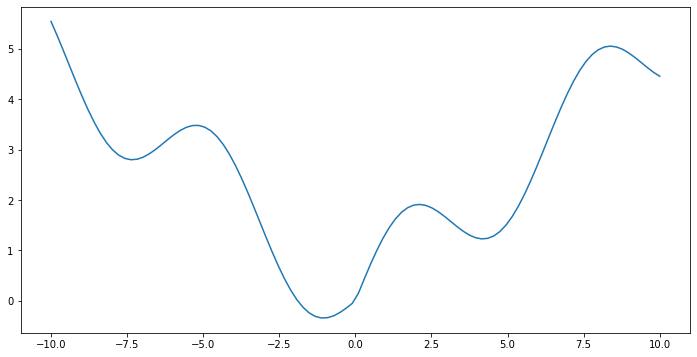

In [23]:
plt.figure(figsize=(12,6))
x = np.linspace(-10,10,100)
plt.plot(x,annealingData(x));

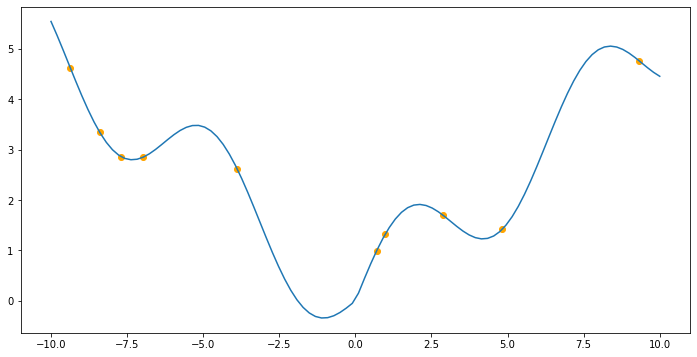

In [25]:
plt.figure(figsize=(12,6))
points = np.random.uniform(-10,10, size = 10)

plt.plot(x,annealingData(x));
plt.scatter(points,annealingData(points), color = "orange")

In [26]:
temperature = 1

newPoints = points + temperature * np.random.normal(size=10)

for i in range(0,len(points)):
    if annealingData(newPoints[i]) < annealingData(points[i]):
        points[i] = newPoints[i]


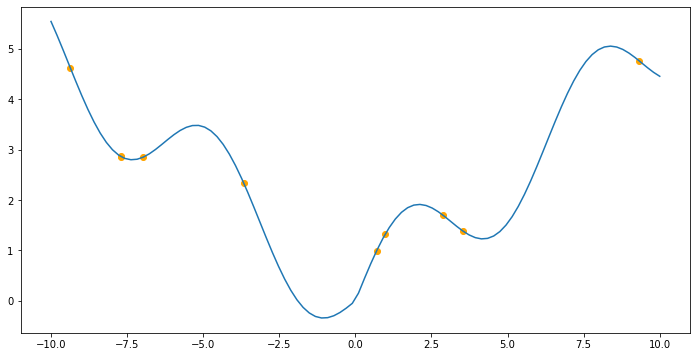

In [27]:
plt.figure(figsize=(12,6))
plt.plot(x,annealingData(x));
plt.scatter(points,annealingData(points), color = "orange")

In [36]:
points = np.array([-7,-6,5,4,7,8,9,10])
temperature = 5

mins = []
temps = []

for n in range(0,10):
    temperature = temperature/(n+1)

    newPoints = points + temperature * np.random.normal(size=len(points))

    for i in range(0,len(points)):
        if annealingData(newPoints[i]) < annealingData(points[i]):
            points[i] = newPoints[i]
            
    mins.append(min(annealingData(points)))
    temps.append(temperature)
    print(mins[n])

0.0
0.0
0.0
0.0
-0.3414709848078965
-0.3414709848078965
-0.3414709848078965
-0.3414709848078965
-0.3414709848078965
-0.3414709848078965


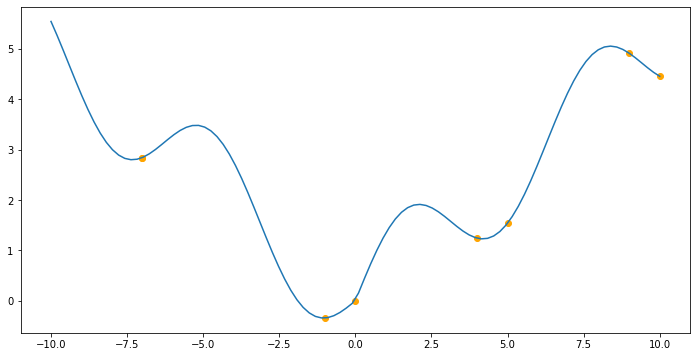

In [37]:
plt.figure(figsize=(12,6))
plt.plot(x,annealingData(x));
plt.scatter(points,annealingData(points), color = "orange")